<a href="https://colab.research.google.com/github/carlosfab/escola-data-science/blob/master/Aula_081_Introdu%C3%A7%C3%A3o_aos_Modelos_Generativos_e_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a align="left" href="http://escola.sigmoidal.ai/assinar-eds/" target="_blank">
<img width="1024", src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/header_colab.png"></a>

Esse é um **material de apoio da 🚀 Escola de Data Science** por **Carlos Melo**.<br>Para ter acesso a diversos cursos e mais de 150 horas de aulas,<br>[clique neste link e assine agora a Escola de Data Science](http://escola.sigmoidal.ai/assinar-eds/).

# Aula 081 - Introdução aos Modelos Generativos e Autoencoders

Você quer criar obras de arte com apenas uma linha de comando? Ou criar NFTs completamente originais com Inteligência Artificial? Ou transformar abelhas em cachorros? Ou criar personagens 3D animados? 

Bem, se a sua respostar para qualquer uma das perguntas acima for "sim", você provavelmente vai querer conheceer mais sobre o fantástico mundo dos Modelos Generativos.

<br><center>
<img width="512" src="https://s.yimg.com/os/creatr-uploaded-images/2019-03/14bdcdd0-4aff-11e9-bbbd-8ff0d03ba4ac"></center>

Tendo ganho bastante destaque nos últimos anos, esses modelos de Deep Learning tem apresentado resultados surpreendentes, tendo aplicações como:

* Colorir de imagens e filmes antigos;
* Gerar de imagens como técnica de data augmentation;
* Aumentar aresolução de imagens;
* Edição de filmes e efeitos especiais (VFX);
* Substituição de fundo verde (chroma key);
* Gerar imagens realistas a partir de rascunhos básicos; e
* Gerar áudios, imagens e outros tipos de dados.

Claro, essas são apenas algumas aplicações possíveis. Mas considerando o surgimento relativamente recente dessa linha de pesquisa, fica claro que estamos vendo apenas a ponta do iceberg.

> *Adversarial Training is the most interesting idea in the last 10 years in Machine Learning*<br>**Yann LeCun (Director of AI Research at Facebook AI)**

Entre os diversos modelos existentes na literatura, sem entrar profundamente em taxonomias propostas na literatura científica, é possível observar duas famílias que se destacam: 

1. Generative Adversarial Networks (GANs); e
2. Autoencoders Variacionais (VAEs).

Apesar de ambas arquiteturas serem aparentemente semelhantes em relação ao que produzem, elas trabalham de maneiras bem diferentes. Para prosseguir com a nossa sequência de aulas, irei começar apresentando os conceitos fundamentais relativos aos Autoencoders, suas aplicações, e isso nos levará naturalmente ao universo das GANs - o nosso estado da arte atualmente.

## Introdução aos Autoencoders

Se eu pudesse resumir de maneira bastante simples o que são os autoencoders, eu diria que são arquiteturas que permitem copiar seus *inputs* para os seus *outputs*.

Os autoencoders podem ser pensados como uma certa forma de compressão, assim como arquivos WAV podem ser compactados em arquivos MP3, ou imagens BMP em JPEG.

<br><center>
<img width="512" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/1*oUbsOnYKX5DEpMOK3pH_lg.png"></center>





### Implementando um autoencoders para redução de dimensionalidade

In [ ]:
import tensorflow as tf
from tensorflow import keras
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [ ]:
n_samples = 100
l_range = 0
h_range = 10

z = np.random.random(n_samples) # * (h_range - l_range) + l_range
x = np.sin(z) + 0.1 * np.random.randn(n_samples)
y = np.cos(z) + 0.1 * np.random.randn(n_samples)

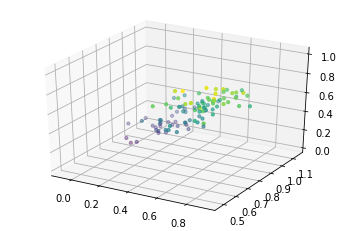

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='viridis', s=10);

In [ ]:
x_train = pd.DataFrame(data={'x': x, 'y': y, 'z': z})

In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4215
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 0.1971
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0993
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0565
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0376
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 9/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 10/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 11/20
4/4 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 12/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0167
Epoch 13/20
4/4 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
codings = encoder.predict(x_train)

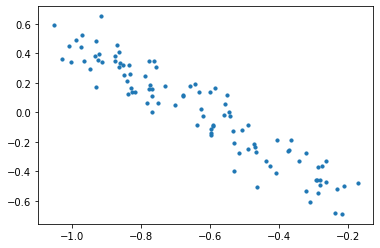

In [ ]:
plt.scatter(codings[:, 0], codings[:, 1], s=10);

In [ ]:
decodings = decoder.predict(codings)

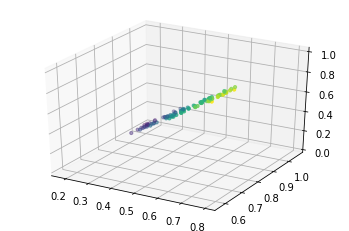

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:,2], cmap='viridis', s=10);

In [ ]:
decodings[0]

array([0.7956333 , 0.57424176, 0.97378683], dtype=float32)

**Na próxima aula nós continuaremos com os Variational Autoencoders (VAN), antes de prosseguirmos para os GANs.**